# Predicting Flight Arrival Delays
## By Nick Palacio

### Constants

In [1]:
flightDataFile = './Flight Delays Data.csv'
depDelayCol = 'DepDelay'
arrDelayCol = 'ArrDelay'
carrierCol = 'Carrier'
originAirportCol = 'OriginAirportID'
monthCol = 'Month'
dayCol = 'DayOfWeek'

### Load Data

In [2]:
import pandas as pd
# data = pd.read_csv(flightDataFile, nrows=20)
data = pd.read_csv(flightDataFile)
data

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,4,19,5,DL,11433,13303,837,-3.0,0.0,1138,1.0,0.0,0.0
1,2013,4,19,5,DL,14869,12478,1705,0.0,0.0,2336,-8.0,0.0,0.0
2,2013,4,19,5,DL,14057,14869,600,-4.0,0.0,851,-15.0,0.0,0.0
3,2013,4,19,5,DL,15016,11433,1630,28.0,1.0,1903,24.0,1.0,0.0
4,2013,4,19,5,DL,11193,12892,1615,-6.0,0.0,1805,-11.0,0.0,0.0
5,2013,4,19,5,DL,10397,15016,1726,-1.0,0.0,1818,-19.0,0.0,0.0
6,2013,4,19,5,DL,15016,10397,1900,0.0,0.0,2133,-1.0,0.0,0.0
7,2013,4,19,5,DL,10397,14869,2145,15.0,1.0,2356,24.0,1.0,0.0
8,2013,4,19,5,DL,10397,10423,2157,33.0,1.0,2333,34.0,1.0,0.0
9,2013,4,19,5,DL,11278,10397,1900,323.0,1.0,2055,322.0,1.0,0.0


### Clean Data

#### Missing Data

In [3]:
# TODO: Use print statement like below for this
# Git test
columnName = depDelayCol
rowCountBefore = data.loc[(data[columnName].isnull())].shape[0]
data[columnName].fillna(0, inplace=True)
rowCountAfter = data.loc[(data[columnName].isnull())].shape[0]
print('Filled in ' + str(rowCountBefore - rowCountAfter) + ' missing values for ' + columnName)

Filled in 27444 missing values for DepDelay


In [4]:
columnName = arrDelayCol
rowCountBefore = data.loc[(data[columnName].isnull())].shape[0]
data[columnName].fillna(0, inplace=True)
rowCountAfter = data.loc[(data[columnName].isnull())].shape[0]
print('Filled in ' + str(rowCountBefore - rowCountAfter) + ' missing values for ' + columnName)

Filled in 29033 missing values for ArrDelay


#### Duplicate Rows

In [5]:
rowCountBefore = data.shape[0]
data.drop_duplicates(subset=['Year','Month','DayofMonth','Carrier','OriginAirportID','DestAirportID','CRSDepTime','CRSArrTime'], inplace=True)
rowCountAfter = data.shape[0]
print('Deleted ' + str(rowCountBefore - rowCountAfter) + ' duplicate rows')

Deleted 21 duplicate rows


### Analyze Features

In [6]:
import matplotlib.pyplot as plt

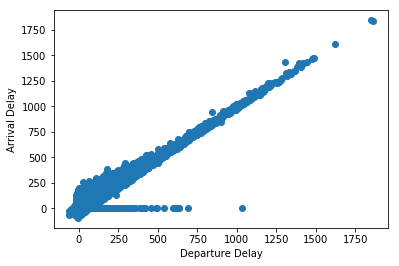

In [7]:
arrDelayData = data[arrDelayCol]
depDelayData = data[depDelayCol]
plt.scatter(depDelayData, arrDelayData)
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.show()

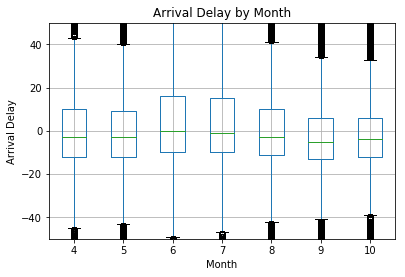

In [26]:
ax = data.boxplot(arrDelayCol,by=monthCol,return_type=None)
ax.set_ylim(-50,50)
plt.axes(ax)
plt.ylabel('Arrival Delay')
plt.xlabel('Month')
plt.title('Arrival Delay by Month')
plt.suptitle('')
plt.show()

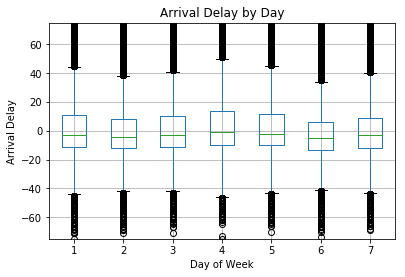

In [29]:
ax = data.boxplot(arrDelayCol,by=dayCol,return_type=None)
ax.set_ylim(-75,75)
plt.axes(ax)
plt.ylabel('Arrival Delay')
plt.xlabel('Day of Week')
plt.title('Arrival Delay by Day')
plt.suptitle('')
plt.show()